In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_url = "datasets/income_datav1.csv"
test_url = "datasets/income_test_datav1.csv"

data = pd.read_csv(data_url)
test = pd.read_csv(test_url)

# Dimensions of the dataset used for training:
print(data.shape)

(32561, 15)


In [3]:
# Target Name: income

data["income"] = data["income"].apply(lambda x: 0 if x == " <=50K" else 1)
test["income"] = test["income"].apply(lambda x: 0 if x == " <=50K." else 1)

In [4]:
# Train - Validation -> 80 - 20

random_selection = np.random.rand(len(data.index)) <= 0.80
train_data = data[random_selection]
valid_data = data[~random_selection]
test_data = test.copy()

In [5]:
from functions import functions

# Batch Size: 128

train_data = functions.dataframe_to_dataset(train_data, "income", 128)
valid_data = functions.dataframe_to_dataset(valid_data, "income", 128)
test_data = functions.dataframe_to_dataset(test_data, "income", 128)

In [6]:
categorical_columns_strings = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]
numerical_columns = ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]

In [7]:
# Model inputs of categorical and numerical features

categorical_inputs_strings = functions.input_Model(categorical_columns_strings, "string")
numerical_inputs_integers = functions.input_Model(numerical_columns, "float32")

In [8]:
vocabulary = [
    sorted([str(value) for value in list(data[feature_name].unique())]) for feature_name in categorical_columns_strings
]

In [9]:
categorical_features_strings  = functions.features_Model(categorical_inputs_strings,
                                               categorical_columns_strings, 
                                               train_data, 
                                               "categorical",
                                               is_string=True,
                                               use_embedding=True,
                                               vocabulary=vocabulary
                                               )
numerical_features_integers =  functions.features_Model(numerical_inputs_integers,
                                              numerical_columns,
                                              train_data,
                                              "numerical",
                                              )

all_inputs = categorical_inputs_strings + numerical_inputs_integers 

all_features = categorical_features_strings + numerical_features_integers
all_features = keras.layers.concatenate(all_features)

In [10]:
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(all_inputs, output)
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
205/205 [==============================] - 5s 9ms/step - loss: 0.4701 - accuracy: 0.7873 - val_loss: 0.3395 - val_accuracy: 0.8330
Epoch 2/10
205/205 [==============================] - 2s 7ms/step - loss: 0.3337 - accuracy: 0.8401 - val_loss: 0.3201 - val_accuracy: 0.8483
Epoch 3/10
205/205 [==============================] - 2s 7ms/step - loss: 0.3229 - accuracy: 0.8439 - val_loss: 0.3154 - val_accuracy: 0.8483
Epoch 4/10
205/205 [==============================] - 2s 8ms/step - loss: 0.3171 - accuracy: 0.8475 - val_loss: 0.3142 - val_accuracy: 0.8475
Epoch 5/10
205/205 [==============================] - 2s 7ms/step - loss: 0.3150 - accuracy: 0.8474 - val_loss: 0.3129 - val_accuracy: 0.8483
Epoch 6/10
205/205 [==============================] - 2s 7ms/step - loss: 0.3133 - accuracy: 0.8483 - val_loss: 0.3130 - val_accuracy: 0.8491
Epoch 7/10
205/205 [==============================] - 2s 7ms/step - loss: 0.3116 - accuracy: 0.8491 - val_loss: 0.3119 - val_accuracy: 0.8499
Epoch 

In [11]:
# Loss and accuracy value for test dataset

result = model.evaluate(test_data)

128/128 [==============================] - 1s 4ms/step - loss: 0.3086 - accuracy: 0.8512


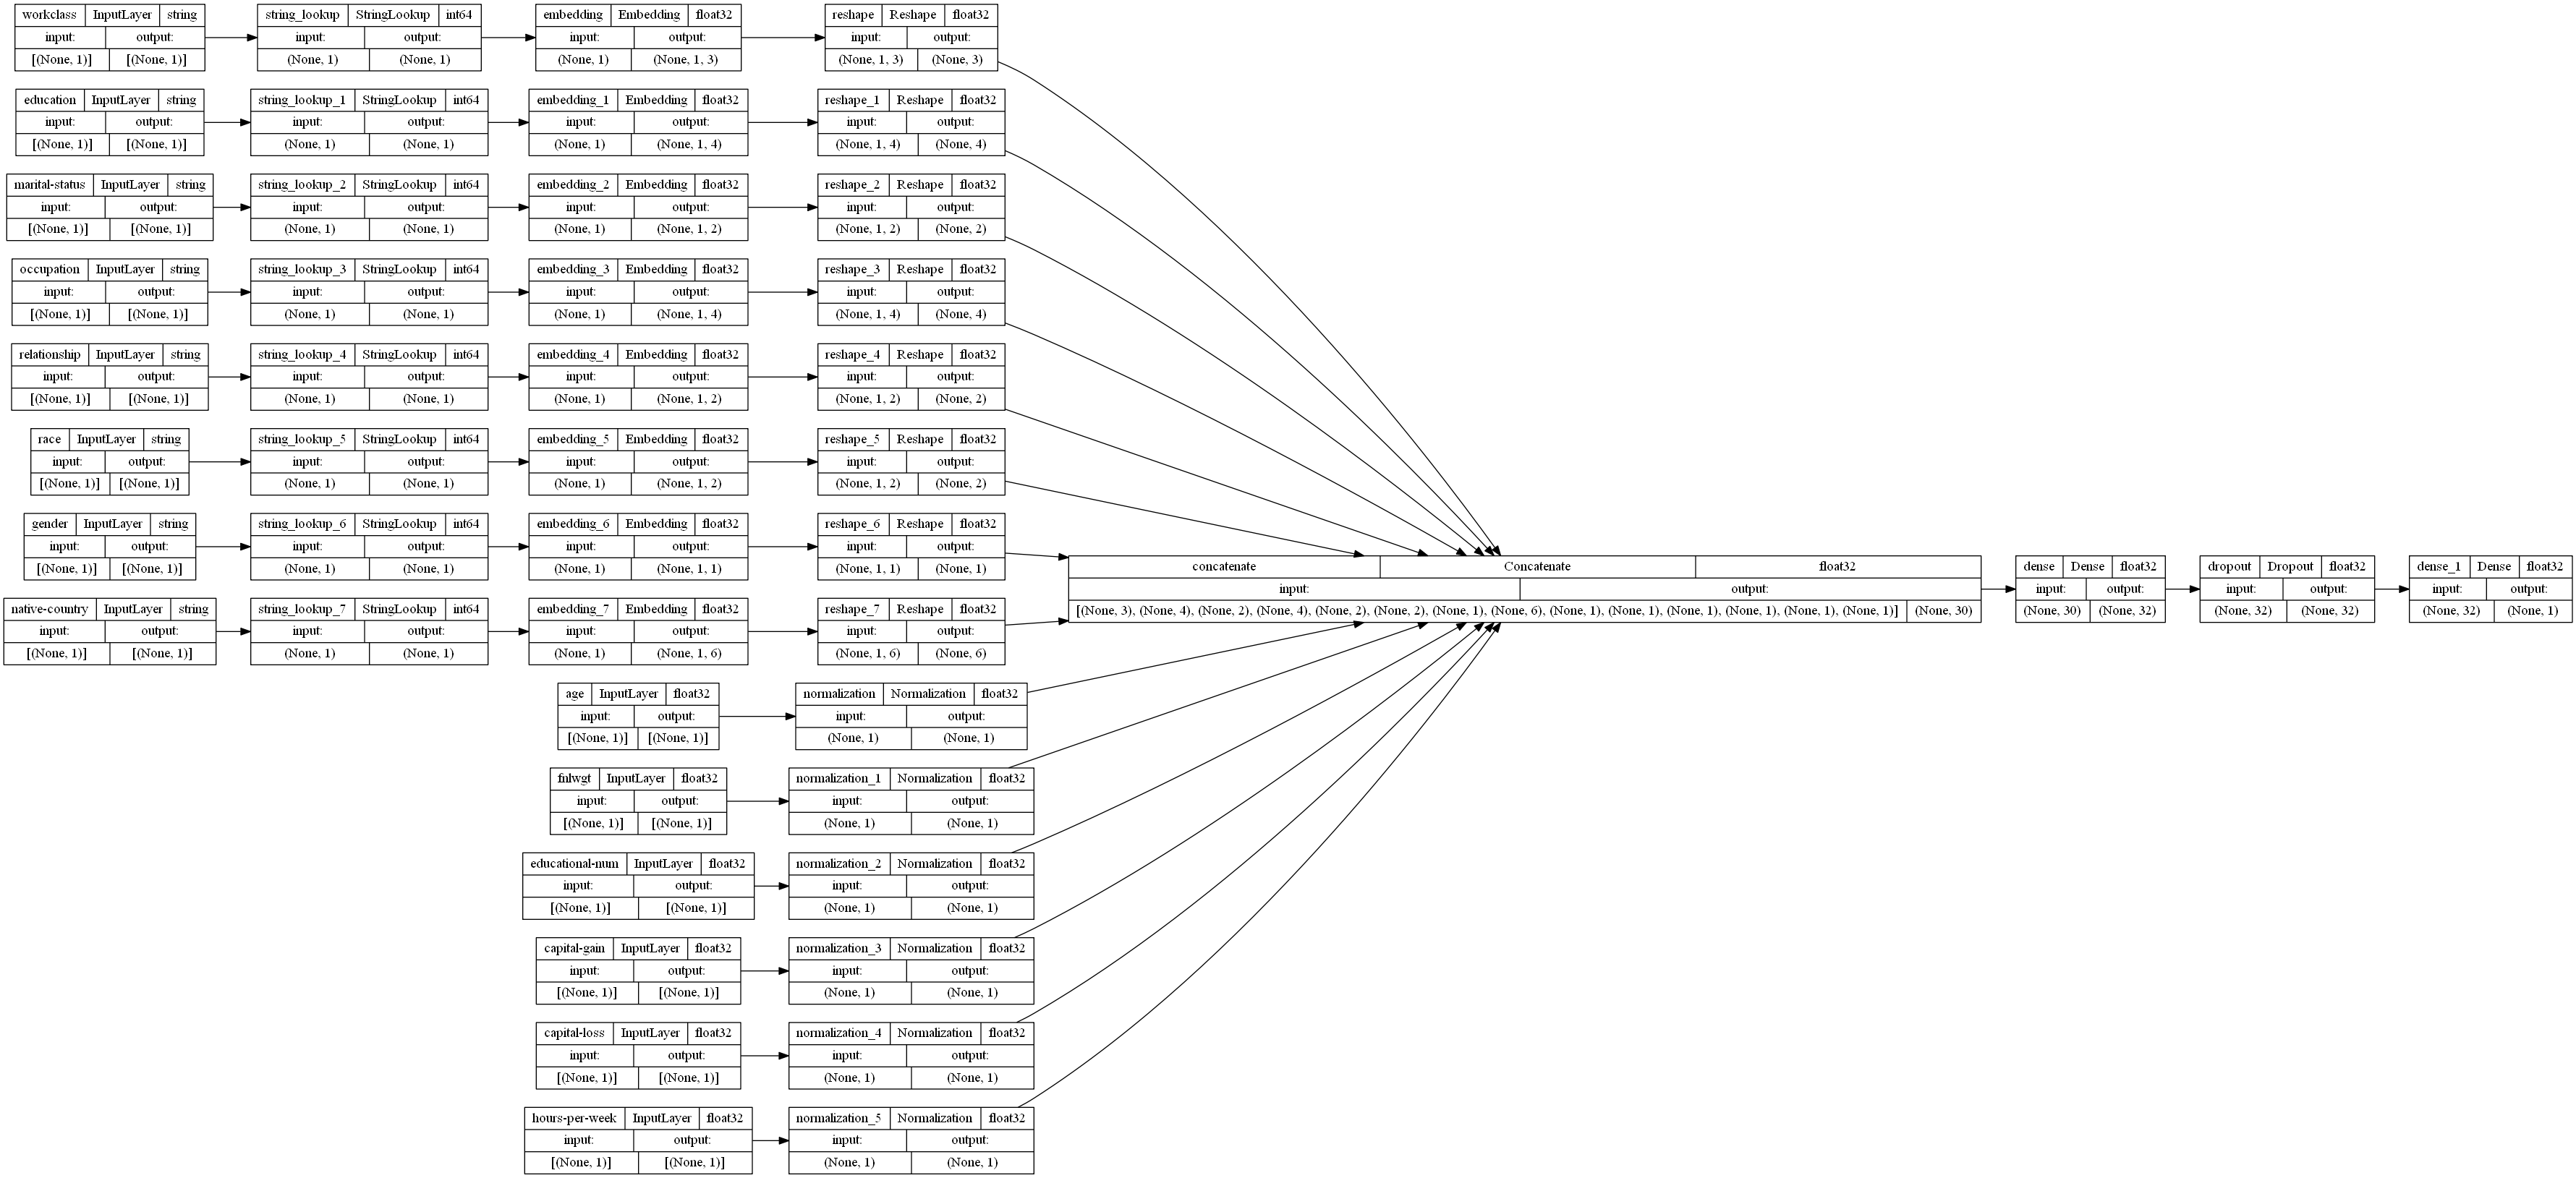

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, rankdir="LR")

## Source
https://keras.io/examples/structured_data/structured_data_classification_from_scratch/